# Solvent Accessible Surface Area (SASA) Calculation

In this example, we'll compute the solvent accessible surface area of one of the residues in our protien
accross each frame in a MD trajectory. We're going to use our trustly alanine dipeptide trajectory for
this calculation, but in a real-world situtation you'll probably want to use a more interesting peptide
or protein, especially one with a Trp residue.

In [1]:
%matplotlib inline
import numpy as np

import mdtraj as md

We'll use the algorithm from Shrake and Rupley for computing the SASA. Here's the function in MDTraj:

In [2]:
help(md.shrake_rupley)

Help on function shrake_rupley in module mdtraj.geometry.sasa:

shrake_rupley(traj, probe_radius=0.14, n_sphere_points=960, mode='atom', change_radii=None, get_mapping=False)
    Compute the solvent accessible surface area of each atom or residue in each simulation frame.
    
    Parameters
    ----------
    traj : Trajectory
        An mtraj trajectory.
    probe_radius : float, optional
        The radius of the probe, in nm.
    n_sphere_points : int, optional
        The number of points representing the surface of each atom, higher
        values leads to more accuracy.
    mode : {'atom', 'residue'}
        In mode == 'atom', the extracted areas are resolved per-atom
        In mode == 'residue', this is consolidated down to the
        per-residue SASA by summing over the atoms in each residue.
    change_radii : dict, optional
        A partial or complete dict containing the radii to change from the
        defaults. Should take the form {"Symbol" : radii_in_nm }, e.g.
     

In [3]:
trajectory = md.load("ala2.h5")
sasa = md.shrake_rupley(trajectory)

print(trajectory)
print("sasa data shape", sasa.shape)

<mdtraj.Trajectory with 100 frames, 22 atoms, 3 residues, without unitcells>
sasa data shape (100, 22)


/Users/singhs15/work/src/dev-projs/mdtraj/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


The computed `sasa` array contains the solvent accessible surface area for each atom in each frame of the trajectory. Let's sum over all of the atoms to get the total SASA from all of the atoms in each frame.

In [4]:
total_sasa = sasa.sum(axis=1)
print(total_sasa.shape)

(100,)


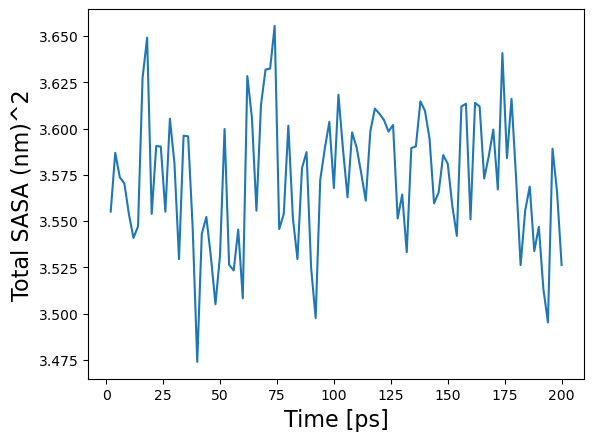

In [ ]:
from matplotlib.pyplot import plot, semilogx, show, xlabel, ylabel

plot(trajectory.time, total_sasa)
xlabel("Time [ps]", size=16)
ylabel("Total SASA (nm)^2", size=16)
show()

We probably don't really have enough data do compute a meaningful [autocorrelation](http://en.wikipedia.org/wiki/Autocorrelation), but for more realistic datasets, this might be something that you want to do.

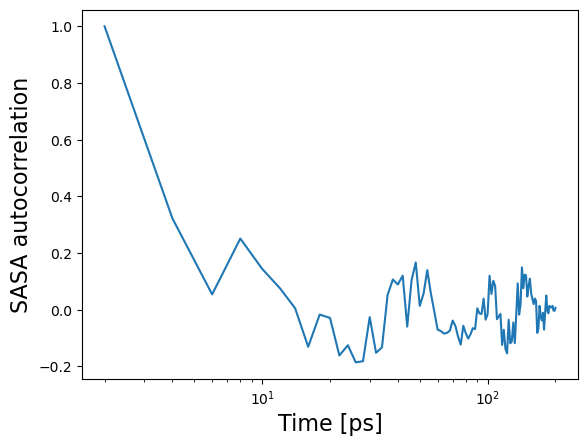

In [6]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode="full")
    result = result[result.size // 2 :]
    return result / result[0]


semilogx(trajectory.time, autocorr(total_sasa))
xlabel("Time [ps]", size=16)
ylabel("SASA autocorrelation", size=16)
show()